In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import compute_pers, calc_bottleneck, downsample_average, SEDT
from generate_examples import make_rings_example

([], [])

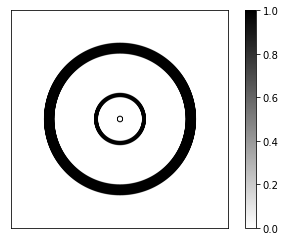

In [2]:
HR_size = 5040
data = make_rings_example(HR_size)

plt.imshow(data, cmap='binary')
plt.colorbar()
plt.xticks([])
plt.yticks([])

In [3]:
HR_binary = np.copy(data)

kernel_size_list = [int(HR_size/i) for i in range(4,HR_size//2+1) if HR_size/i == int(HR_size/i)]

In [4]:
# Compute SEDT images
binary_image_list = [] # list of binary images
sedt_image_list = [] # list of sedt images
num_pixels_list = [] # list keeping track of resolution
for ks in kernel_size_list:
    
    # Downsample with threshold t=0.5
    img = downsample_average(HR_binary, ks, t=0.5)
    
    # Keep list of binary images
    binary_image_list.append(np.copy(img))
        
    # Compute SEDT
    sedt = SEDT(img)
    
    num_pixels_list.append(len(sedt))
    
    # Scale SEDT
    scale = HR_size/len(sedt)
    sedt_image_list.append( sedt*scale )
        
# lastly add in high resolution version
binary_image_list.append(np.copy(HR_binary))
sedt_image_list.append(SEDT(HR_binary))
num_pixels_list.append(HR_size)

### Compute Persistence Diagrams

In [5]:
All_Dgms = []
maxes = []
mins = []
for i,image in enumerate(sedt_image_list):
    
    # Keep track of max and mins of images
    maxes.append(np.amax(image))
    mins.append(np.amin(image))
    
    # Compute pers dgms
    dgms = compute_pers(image, dgm_format='giotto') # Diagrams from T Construction
    
    # Keep list of all diagrams
    All_Dgms.append(dgms)

### Compute Bottleneck distance

In [6]:
bdists_0_HR = []
dim = 0
for i in range(len(All_Dgms)):
    dgm_a = All_Dgms[i][0]
    dgm_a = dgm_a[dgm_a[:,2] == dim]
    
    dgm_b = All_Dgms[-1][0]
    dgm_b = dgm_b[dgm_b[:,2] == dim]

    d = calc_bottleneck(dgm_a, dgm_b)
    bdists_0_HR.append( d )
    
bdists_1_HR = [] 
dim = 1
for i in range(len(All_Dgms)):
    dgm_a = All_Dgms[i][0]
    dgm_a = dgm_a[dgm_a[:,2] == dim]
    
    dgm_b = All_Dgms[-1][0]
    dgm_b = dgm_b[dgm_b[:,2] == dim]

    d = calc_bottleneck(dgm_a, dgm_b)
    bdists_1_HR.append( d )

### Plot examples of binary images and SEDTS

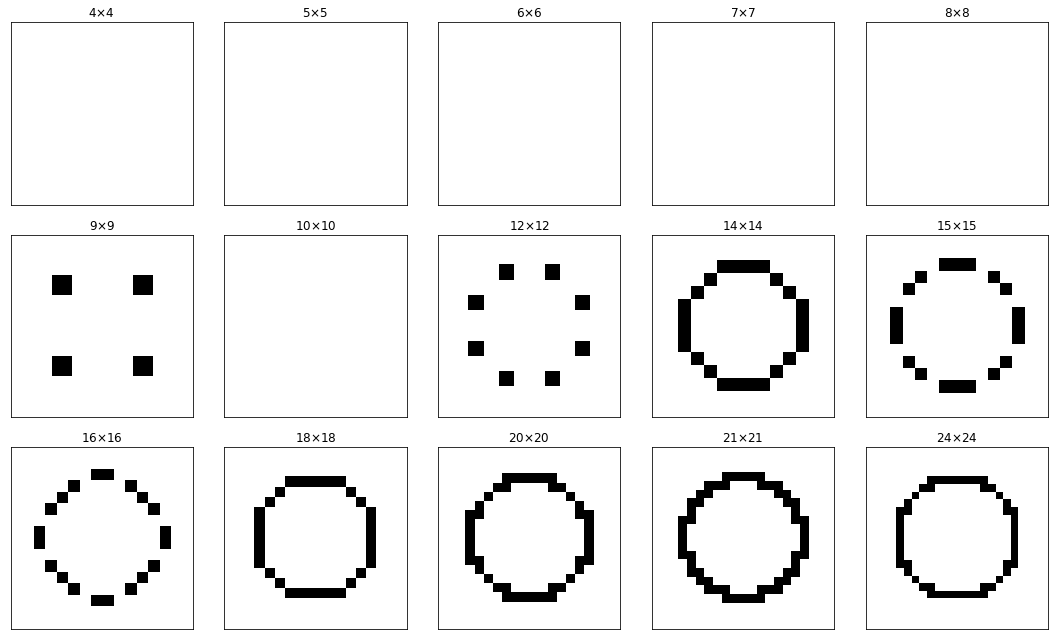

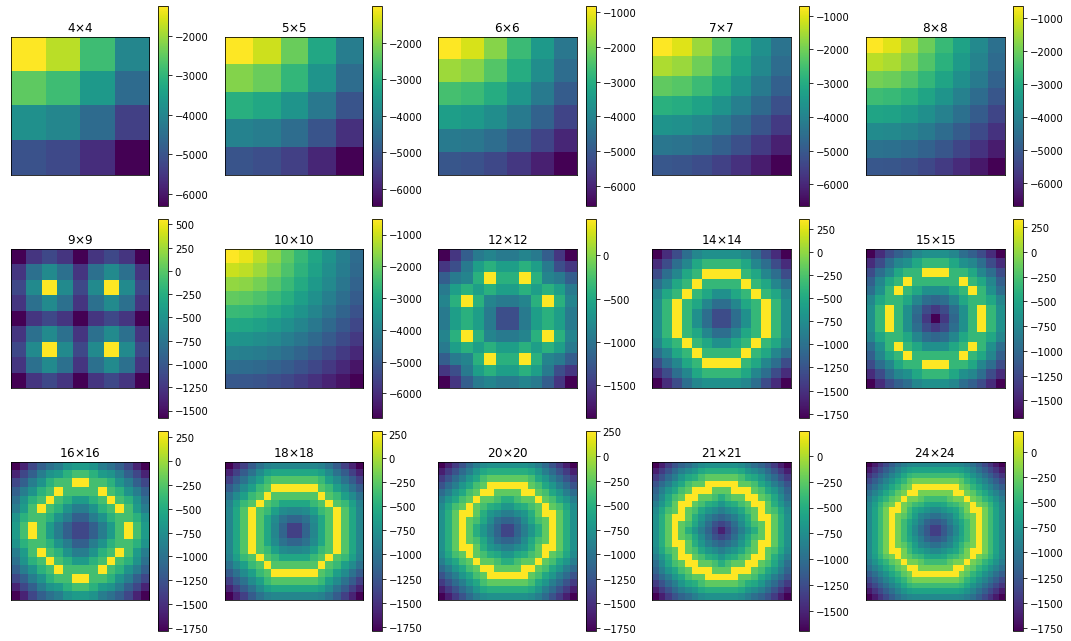

In [7]:
nplots = 15
if nplots > 0:
    plt.figure(figsize=(5*3, 3*3))
    for i in range(len(binary_image_list[:nplots])):
        plt.subplot(3, 5, i+1)
        plt.imshow(binary_image_list[i], cmap='binary')
        plt.xticks([])
        plt.yticks([])
        plt.title(rf'{num_pixels_list[i]}$\times${num_pixels_list[i]}')
    plt.tight_layout()
    
if nplots > 0:
    plt.figure(figsize=(5*3, 3*3))
    for i in range(len(binary_image_list[:nplots])):
        plt.subplot(3, 5, i+1)
        plt.imshow(sedt_image_list[i])
        plt.colorbar()
        plt.xticks([])
        plt.yticks([])
        plt.title(rf'{num_pixels_list[i]}$\times${num_pixels_list[i]}')
    plt.tight_layout()

### Plot high resolution binary image and SEDT

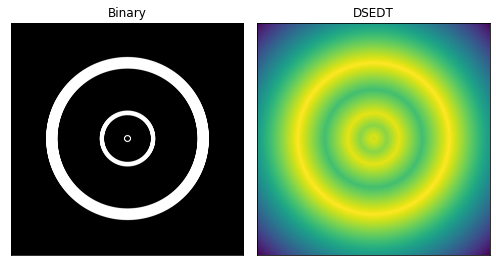

In [8]:
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.imshow(-1*(binary_image_list[-1]-1),cmap='binary')
plt.title('Binary')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.title('DSEDT')
plt.imshow(sedt_image_list[-1])
plt.xticks([])
plt.yticks([])

plt.tight_layout()

### Plot bottleneck distance vs resolution and bottleneck distance vs pixel size

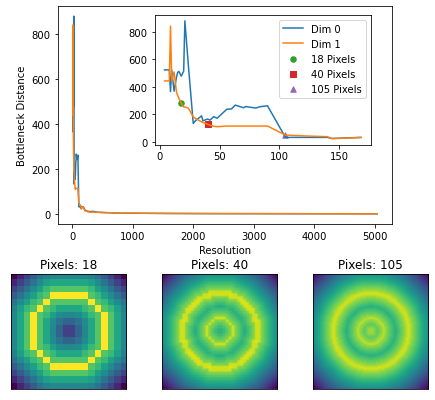

In [9]:
# Where to stop zoomed in figure
switch_pt = 38

ex1 = 11
ex2 = 19
ex3 = 31

fig, ax1 = plt.subplots(figsize=(6,4))
xdata = num_pixels_list # resolution

ax1.plot(xdata, bdists_0_HR, c='C0', label='Dim 0')
ax1.plot(xdata, bdists_1_HR, c='C1', label='Dim 1')
ax1.set_xlabel('Resolution')
ax1.set_ylabel('Bottleneck Distance')


# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.35, 0.4, 0.5, 0.45]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(xdata[:switch_pt], bdists_0_HR[:switch_pt], c='C0', label='Dim 0')
ax2.plot(xdata[:switch_pt], bdists_1_HR[:switch_pt], c='C1', label='Dim 1')
ax2.scatter(xdata[ex1], bdists_1_HR[ex1], s=30, c='C2', label=f'{int(xdata[ex1])} Pixels')
ax2.scatter(xdata[ex2], bdists_1_HR[ex2], s=30, c='C3', marker=',', label=f'{int(xdata[ex2])} Pixels')
ax2.scatter(xdata[ex3], bdists_1_HR[ex3], s=30, c='C4', marker='^', label=f'{int(xdata[ex3])} Pixels')
ax2.legend()


clim_min = min( np.amin(sedt_image_list[ex1]), np.amin(sedt_image_list[ex2]), np.amin(sedt_image_list[ex3]))
clim_max = max( np.amax(sedt_image_list[ex1]), np.amax(sedt_image_list[ex2]), np.amax(sedt_image_list[ex3]))


left, bottom, width, height = [0, -0.45, 0.3, 0.4]
ax3 = fig.add_axes([left, bottom, width, height])
plt.imshow(sedt_image_list[ex1])
plt.clim([clim_min, clim_max])
plt.title(f'Pixels: {xdata[ex1]}')
plt.xticks([])
plt.yticks([])


left, bottom, width, height = [0.35, -0.45, 0.3, 0.4]
ax4 = fig.add_axes([left, bottom, width, height])
plt.imshow(sedt_image_list[ex2])
plt.clim([clim_min, clim_max])
plt.title(f'Pixels: {xdata[ex2]}')
plt.xticks([])
plt.yticks([])

left, bottom, width, height = [0.7, -0.45, 0.3, 0.4]
ax5 = fig.add_axes([left, bottom, width, height])
plt.imshow(sedt_image_list[ex3])
plt.clim([clim_min, clim_max])
plt.title(f'Pixels: {xdata[ex3]}')
plt.xticks([])
plt.yticks([])

plt.savefig('Figs/RingsExample_Resolution.png', dpi=300, bbox_inches='tight')

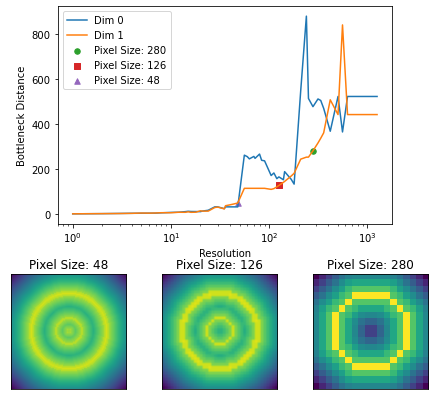

In [10]:
ex1 = 11
ex2 = 19
ex3 = 31

fig, ax1 = plt.subplots(figsize=(6,4))
xdata = max(num_pixels_list)/np.array(num_pixels_list) # pixel size

ax1.semilogx(xdata, bdists_0_HR, c='C0', label='Dim 0')
ax1.semilogx(xdata, bdists_1_HR, c='C1', label='Dim 1')
ax1.set_xlabel('Resolution')
ax1.set_ylabel('Bottleneck Distance')

ax1.scatter(xdata[ex1], bdists_1_HR[ex1], s=30, c='C2', label=f'Pixel Size: {int(xdata[ex1])}')
ax1.scatter(xdata[ex2], bdists_1_HR[ex2], s=30, c='C3', marker=',', label=f'Pixel Size: {int(xdata[ex2])}')
ax1.scatter(xdata[ex3], bdists_1_HR[ex3], s=30, c='C4', marker='^', label=f'Pixel Size: {int(xdata[ex3])}')
ax1.legend()


clim_min = min( np.amin(sedt_image_list[ex1]), np.amin(sedt_image_list[ex2]), np.amin(sedt_image_list[ex3]))
clim_max = max( np.amax(sedt_image_list[ex1]), np.amax(sedt_image_list[ex2]), np.amax(sedt_image_list[ex3]))

left, bottom, width, height = [0.7, -0.45, 0.3, 0.4]
ax3 = fig.add_axes([left, bottom, width, height])
plt.imshow(sedt_image_list[ex1])
plt.clim([clim_min, clim_max])
plt.title(f'Pixel Size: {int(xdata[ex1])}')
plt.xticks([])
plt.yticks([])


left, bottom, width, height = [0.35, -0.45, 0.3, 0.4]
ax4 = fig.add_axes([left, bottom, width, height])
plt.imshow(sedt_image_list[ex2])
plt.clim([clim_min, clim_max])
plt.title(f'Pixel Size: {int(xdata[ex2])}')
plt.xticks([])
plt.yticks([])

left, bottom, width, height = [0, -0.45, 0.3, 0.4]
ax5 = fig.add_axes([left, bottom, width, height])
plt.imshow(sedt_image_list[ex3])
plt.clim([clim_min, clim_max])
plt.title(f'Pixel Size: {int(xdata[ex3])}')
plt.xticks([])
plt.yticks([])

plt.savefig('Figs/RingsExample_PixelSize.png', dpi=300, bbox_inches='tight')